In [1]:
import pandas as pd
from sklearn import neural_network as nn
from sklearn import preprocessing as prep
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [4]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


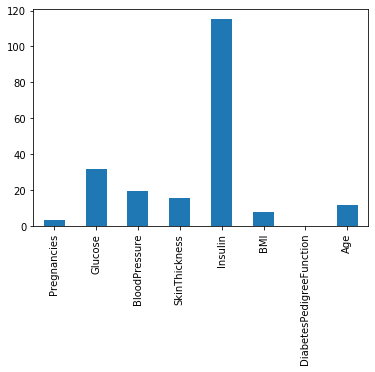

In [5]:
X.std(axis=0).plot(kind='bar')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
pipe = Pipeline([
    ('scaler', prep.StandardScaler()),
    ('clf', nn.MLPClassifier([10, 10, 10], activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1))
])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=[10, 10, 10],
                               learning_rate_init=0.2, max_iter=500,
                               random_state=1, solver='sgd'))])

In [9]:
pipe.score(xtest, ytest)

0.7662337662337663

In [10]:
pipe.score(xtrain, ytrain)

0.7915309446254072

In [13]:
pipe[-1].out_activation_

'logistic'

In [16]:
clf = pipe[-1]

In [17]:
clf

MLPClassifier(hidden_layer_sizes=[10, 10, 10], learning_rate_init=0.2,
              max_iter=500, random_state=1, solver='sgd')

In [19]:
clf.coefs_[0].shape

(8, 10)